In [133]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [134]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [135]:
NUM_CLASSES = 28

# Dataset reading

In [136]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [137]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [139]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [140]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_12 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 28)             │           308 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,378 (5.38 KB)

 Trainable params: 1,378 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

In [141]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [142]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [143]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
49/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0359 - loss: 3.3691   
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0445 - loss: 3.3532 - val_accuracy: 0.1030 - val_loss: 3.2472
Epoch 2/1000
60/86 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.0892 - loss: 3.2388
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0901 - loss: 3.2287 - val_accuracy: 0.1104 - val_loss: 3.0956
Epoch 3/1000
61/86 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.1009 - loss: 3.1109
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1018 - loss: 3.1000 - val_accuracy: 0.1433 - val_loss: 2.9337
Epoch 4/1000
53/86 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.1217 - loss: 2.9497
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1249 - loss: 2.9408 - val_accuracy: 0.2243 - val_loss: 2.7472
Epoch 5/1000
72/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1572 - loss: 2.8281
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1578 - loss: 2.8219 - val_accuracy: 0.2803 - val_loss: 2.5682
Epoch 6/1000
61/86 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.1818 - loss: 2.7079
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1834 - loss: 2.6948 - val_accuracy: 0.3542 - val_loss: 2.3828
Epoch 7/1000
59/86 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.2077 - loss: 2.5943
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2062 - loss: 2.5844 - val_accuracy: 0.3737 - val_loss: 2.2357
Epoch 8/1000
59/86 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.2125 - loss: 2.4801
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2132 - loss: 2.4781 - val_accuracy: 0.4033 - val_loss: 2.1155
Epoch 9/1000
49/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2344 - loss: 2.4113 
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2311 - loss: 2.4129 - val_accuracy: 0.4187 - val_loss: 2.0175
Epoch 10/1000
54/86 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.2339 - loss: 2.3691
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2360 - loss: 2.3605 - val_accuracy: 0.4651 - val_loss: 1.9348
Epoch 11/1000
47/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2522 - loss: 2.2940 
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2525 - loss: 2.2977 - val_accuracy: 0.5110 - val_loss: 1.8753
Epoch 12/1000
47/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2585 - loss: 2.2782 
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2568 - loss: 2.2799 - val_accuracy: 0.5393 - val_loss: 1.8437
Epoch 13/1000
52/86 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.2700 - loss: 2.2334
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2723 - loss: 2.2306 - val_accuracy: 0.5275 - val_loss: 1.7766
Epoch 14/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.2810 - loss: 2.1892
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2791 - loss: 2.1920 - val_accuracy: 0.5571 - val_loss: 1.7572
Epoch 15/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.2823 - loss: 2.2006
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2815 - loss: 2.2002 - val_accuracy: 0.5535 - val_loss: 1.7172
Epoch 16/1000
53/86 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.2825 - loss: 2.1680
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2831 - loss: 2.1670 - val_accuracy: 0.5634 - val_loss: 1.6925
Epoch 17/1000
50/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3138 - loss: 2.1237 
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3110 - loss: 2.1212 - val_accuracy: 0.5953 - val_loss: 1.6501
Epoch 18/1000
49/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2966 - loss: 2.1405 
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2961 - loss: 2.1398 - val_accuracy: 0.5758 - val_loss: 1.6288
Epoch 19/1000
49/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2969 - loss: 2.1198 
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2987 - loss: 2.1177 - val_accuracy: 0.5964 - val_loss: 1.6116
Epoch 20/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.3087 - loss: 2.0802
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3085 - loss: 2.0790 - val_accuracy: 0.6076 - val_loss: 1.5843
Epoch 21/1000
84/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3229 - loss: 2.0532
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3228 - loss: 2.0534 - val_accuracy: 0.6310 - val_loss: 1.5668
Epoch 22/1000
59/86 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.3156 - loss: 2.0614
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3186 - loss: 2.0571 - val_accuracy: 0.6400 - val_loss: 1.5571
Epoch 23/1000
53/86 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.3226 - loss: 2.0569
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3244 - loss: 2.0475 - val_accuracy: 0.6170 - val_loss: 1.5304
Epoch 24/1000
52/86 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.3241 - loss: 2.0346
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3262 - loss: 2.0333 - val_accuracy: 0.6439 - val_loss: 1.5168
Epoch 25/1000
52/86 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.3302 - loss: 2.0206
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3316 - loss: 2.0177 - val_accuracy: 0.6442 - val_loss: 1.5132
Epoch 26/1000
57/86 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.3329 - loss: 2.0303
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3358 - loss: 2.0220 - val_accuracy: 0.6340 - val_loss: 1.4973
Epoch 27/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.3301 - loss: 2.0118
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3317 - loss: 2.0082 - val_accuracy: 0.6529 - val_loss: 1.5003
Epoch 28/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.3413 - loss: 1.9974
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3415 - loss: 1.9910 - val_accuracy: 0.6502 - val_loss: 1.4605
Epoch 29/1000
57/86 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.3333 - loss: 2.0259
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3366 - loss: 2.0094 - val_accuracy: 0.6735 - val_loss: 1.4462
Epoch 30/1000
45/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3491 - loss: 1.9530 
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3482 - loss: 1.9597 - val_accuracy: 0.6606 - val_loss: 1.4419
Epoch 31/1000
50/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3422 - loss: 1.9679 
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3437 - loss: 1.9638 - val_accuracy: 0.6763 - val_loss: 1.4370
Epoch 32/1000
58/86 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.3521 - loss: 1.9465
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3502 - loss: 1.9488 - val_accuracy: 0.6708 - val_loss: 1.4357
Epoch 33/1000
48/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3539 - loss: 1.9516 
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3545 - loss: 1.9453 - val_accuracy: 0.6766 - val_loss: 1.4200
Epoch 34/1000
50/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3599 - loss: 1.8986 
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3564 - loss: 1.9064 - val_accuracy: 0.6461 - val_loss: 1.3988
Epoch 35/1000
51/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3577 - loss: 1.9198 
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3558 - loss: 1.9204 - val_accuracy: 0.6505 - val_loss: 1.3943
Epoch 36/1000
49/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3591 - loss: 1.9099 
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3595 - loss: 1.9108 - val_accuracy: 0.6768 - val_loss: 1.3892
Epoch 37/1000
47/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3482 - loss: 1.9515 
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3529 - loss: 1.9422 - val_accuracy: 0.6776 - val_loss: 1.3835
Epoch 38/1000
47/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3676 - loss: 1.8961 
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3682 - loss: 1.8922 - val_accuracy: 0.6661 - val_loss: 1.3778
Epoch 39/1000
53/86 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.3761 - loss: 1.8936
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3705 - loss: 1.8909 - val_accuracy: 0.6766 - val_loss: 1.3547
Epoch 40/1000
52/86 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.3546 - loss: 1.9212
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3590 - loss: 1.9110 - val_accuracy: 0.6752 - val_loss: 1.3606
Epoch 41/1000
55/86 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.3608 - loss: 1.8816
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3632 - loss: 1.8758 - val_accuracy: 0.6853 - val_loss: 1.3549
Epoch 42/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.3773 - loss: 1.8417
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3756 - loss: 1.8490 - val_accuracy: 0.6779 - val_loss: 1.3374
Epoch 43/1000
53/86 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.3662 - loss: 1.8778
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3675 - loss: 1.8754 - val_accuracy: 0.6878 - val_loss: 1.3334
Epoch 44/1000
54/86 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.3855 - loss: 1.8530
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3812 - loss: 1.8575 - val_accuracy: 0.6889 - val_loss: 1.3349
Epoch 45/1000
55/86 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.3679 - loss: 1.8474
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3688 - loss: 1.8461 - val_accuracy: 0.6760 - val_loss: 1.3388
Epoch 46/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.3831 - loss: 1.8204
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3829 - loss: 1.8225 - val_accuracy: 0.6829 - val_loss: 1.3240
Epoch 47/1000
54/86 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.3827 - loss: 1.8171
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3830 - loss: 1.8161 - val_accuracy: 0.6790 - val_loss: 1.3074
Epoch 48/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.3793 - loss: 1.8390
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3829 - loss: 1.8306 - val_accuracy: 0.6763 - val_loss: 1.3008
Epoch 49/1000
50/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3810 - loss: 1.8183 
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3821 - loss: 1.8158 - val_accuracy: 0.6804 - val_loss: 1.2971
Epoch 50/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.3962 - loss: 1.8095
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3946 - loss: 1.8114 - val_accuracy: 0.6826 - val_loss: 1.3071
Epoch 51/1000
57/86 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.4067 - loss: 1.7575
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4020 - loss: 1.7695 - val_accuracy: 0.6895 - val_loss: 1.2849
Epoch 52/1000
55/86 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.4050 - loss: 1.8005
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4013 - loss: 1.7984 - val_accuracy: 0.6922 - val_loss: 1.2746
Epoch 53/1000
54/86 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.3836 - loss: 1.8030
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3837 - loss: 1.8073 - val_accuracy: 0.6867 - val_loss: 1.2824
Epoch 54/1000
48/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3793 - loss: 1.8210 
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3870 - loss: 1.8077 - val_accuracy: 0.6922 - val_loss: 1.2638
Epoch 55/1000
54/86 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.3970 - loss: 1.7259
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3947 - loss: 1.7412 - val_accuracy: 0.6851 - val_loss: 1.2772
Epoch 56/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.4094 - loss: 1.7489
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4067 - loss: 1.7567 - val_accuracy: 0.6925 - val_loss: 1.2519
Epoch 57/1000
58/86 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.4012 - loss: 1.7659
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4010 - loss: 1.7636 - val_accuracy: 0.7103 - val_loss: 1.2607
Epoch 58/1000
54/86 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.4008 - loss: 1.7991
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4015 - loss: 1.7934 - val_accuracy: 0.6977 - val_loss: 1.2575
Epoch 59/1000
73/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3966 - loss: 1.7497  
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3960 - loss: 1.7531 - val_accuracy: 0.6917 - val_loss: 1.2423
Epoch 60/1000
52/86 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.4016 - loss: 1.7749
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4017 - loss: 1.7672 - val_accuracy: 0.7068 - val_loss: 1.2244
Epoch 61/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.4182 - loss: 1.7181
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4139 - loss: 1.7298 - val_accuracy: 0.7073 - val_loss: 1.2372
Epoch 62/1000
54/86 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.4068 - loss: 1.7276
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4057 - loss: 1.7365 - val_accuracy: 0.6906 - val_loss: 1.2350
Epoch 63/1000
54/86 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.3997 - loss: 1.7371
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4008 - loss: 1.7409 - val_accuracy: 0.7177 - val_loss: 1.2464
Epoch 64/1000
54/86 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.4067 - loss: 1.7345
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4062 - loss: 1.7401 - val_accuracy: 0.6971 - val_loss: 1.2499
Epoch 65/1000
50/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4162 - loss: 1.7253 
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4147 - loss: 1.7273 - val_accuracy: 0.7037 - val_loss: 1.2298
Epoch 66/1000
55/86 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.4104 - loss: 1.7572
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4100 - loss: 1.7530 - val_accuracy: 0.7177 - val_loss: 1.2107
Epoch 67/1000
57/86 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.4070 - loss: 1.7153
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4081 - loss: 1.7149 - val_accuracy: 0.7142 - val_loss: 1.2056
Epoch 68/1000
57/86 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.4179 - loss: 1.7400
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4161 - loss: 1.7377 - val_accuracy: 0.7021 - val_loss: 1.2268
Epoch 69/1000
53/86 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.4151 - loss: 1.7021
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4161 - loss: 1.7047 - val_accuracy: 0.7043 - val_loss: 1.2195
Epoch 70/1000
51/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4059 - loss: 1.7304 
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4065 - loss: 1.7272 - val_accuracy: 0.7120 - val_loss: 1.2073
Epoch 71/1000
57/86 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.4321 - loss: 1.7191
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4288 - loss: 1.7182 - val_accuracy: 0.7079 - val_loss: 1.1981
Epoch 72/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.4300 - loss: 1.6964
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4241 - loss: 1.7034 - val_accuracy: 0.7186 - val_loss: 1.1951
Epoch 73/1000
58/86 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.4171 - loss: 1.6915
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4176 - loss: 1.6924 - val_accuracy: 0.7065 - val_loss: 1.1927
Epoch 74/1000
57/86 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.4137 - loss: 1.7029
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4140 - loss: 1.7063 - val_accuracy: 0.7155 - val_loss: 1.2010
Epoch 75/1000
51/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4234 - loss: 1.6847 
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4208 - loss: 1.6904 - val_accuracy: 0.7155 - val_loss: 1.1896
Epoch 76/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.4174 - loss: 1.7138
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4177 - loss: 1.7156 - val_accuracy: 0.7109 - val_loss: 1.1773
Epoch 77/1000
57/86 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.4087 - loss: 1.7309
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4122 - loss: 1.7247 - val_accuracy: 0.6925 - val_loss: 1.1918
Epoch 78/1000
53/86 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.4322 - loss: 1.7237
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4265 - loss: 1.7201 - val_accuracy: 0.7114 - val_loss: 1.1865
Epoch 79/1000
53/86 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.4178 - loss: 1.7099
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4198 - loss: 1.7062 - val_accuracy: 0.7177 - val_loss: 1.1924
Epoch 80/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.4154 - loss: 1.7024
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4172 - loss: 1.6980 - val_accuracy: 0.7092 - val_loss: 1.1858
Epoch 81/1000
48/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4412 - loss: 1.6512 
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4356 - loss: 1.6681 - val_accuracy: 0.7208 - val_loss: 1.1712
Epoch 82/1000
55/86 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.4342 - loss: 1.6625
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4344 - loss: 1.6630 - val_accuracy: 0.7114 - val_loss: 1.1720
Epoch 83/1000
55/86 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.4275 - loss: 1.6992
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4282 - loss: 1.6941 - val_accuracy: 0.7180 - val_loss: 1.1766
Epoch 84/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.4321 - loss: 1.6943
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4315 - loss: 1.6900 - val_accuracy: 0.7109 - val_loss: 1.1808
Epoch 85/1000
49/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4362 - loss: 1.6692 
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4375 - loss: 1.6611 - val_accuracy: 0.7180 - val_loss: 1.1701
Epoch 86/1000
52/86 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.4203 - loss: 1.6813
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4224 - loss: 1.6769 - val_accuracy: 0.7208 - val_loss: 1.1553
Epoch 87/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.4335 - loss: 1.6799
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4330 - loss: 1.6795 - val_accuracy: 0.7139 - val_loss: 1.1663
Epoch 88/1000
55/86 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.4262 - loss: 1.6991
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4296 - loss: 1.6843 - val_accuracy: 0.7144 - val_loss: 1.1598
Epoch 89/1000
55/86 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.4410 - loss: 1.6772
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4410 - loss: 1.6693 - val_accuracy: 0.7287 - val_loss: 1.1535
Epoch 90/1000
49/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4402 - loss: 1.6504 
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4380 - loss: 1.6536 - val_accuracy: 0.7153 - val_loss: 1.1529
Epoch 91/1000
49/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4369 - loss: 1.6558 
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4383 - loss: 1.6600 - val_accuracy: 0.7370 - val_loss: 1.1638
Epoch 92/1000
55/86 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.4272 - loss: 1.6420
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4291 - loss: 1.6485 - val_accuracy: 0.7098 - val_loss: 1.1780
Epoch 93/1000
53/86 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.4325 - loss: 1.6798
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4371 - loss: 1.6728 - val_accuracy: 0.7128 - val_loss: 1.1628
Epoch 94/1000
48/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4171 - loss: 1.6958 
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4235 - loss: 1.6823 - val_accuracy: 0.7202 - val_loss: 1.1680
Epoch 95/1000
51/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4507 - loss: 1.6287 
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4485 - loss: 1.6388 - val_accuracy: 0.7131 - val_loss: 1.1571
Epoch 96/1000
53/86 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.4327 - loss: 1.6343
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4359 - loss: 1.6338 - val_accuracy: 0.7175 - val_loss: 1.1400
Epoch 97/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.4424 - loss: 1.6355
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4437 - loss: 1.6353 - val_accuracy: 0.7232 - val_loss: 1.1612
Epoch 98/1000
48/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4519 - loss: 1.6094 
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4502 - loss: 1.6134 - val_accuracy: 0.7298 - val_loss: 1.1493
Epoch 99/1000
50/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4397 - loss: 1.6590 
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4413 - loss: 1.6561 - val_accuracy: 0.7208 - val_loss: 1.1429
Epoch 100/1000
54/86 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.4484 - loss: 1.6383
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4464 - loss: 1.6431 - val_accuracy: 0.7051 - val_loss: 1.1626
Epoch 101/1000
54/86 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.4558 - loss: 1.6149
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4534 - loss: 1.6185 - val_accuracy: 0.7136 - val_loss: 1.1641
Epoch 102/1000
55/86 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.4482 - loss: 1.6576
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4471 - loss: 1.6506 - val_accuracy: 0.7062 - val_loss: 1.1518
Epoch 103/1000
57/86 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.4588 - loss: 1.5751
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4578 - loss: 1.5832 - val_accuracy: 0.7180 - val_loss: 1.1461
Epoch 104/1000
50/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4474 - loss: 1.6152 
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4488 - loss: 1.6157 - val_accuracy: 0.7323 - val_loss: 1.1509
Epoch 105/1000
42/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4418 - loss: 1.6415 
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4438 - loss: 1.6321 - val_accuracy: 0.7284 - val_loss: 1.1417
Epoch 106/1000
54/86 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.4480 - loss: 1.6035
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4473 - loss: 1.6091 - val_accuracy: 0.7208 - val_loss: 1.1289
Epoch 107/1000
55/86 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.4616 - loss: 1.5789
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4566 - loss: 1.5923 - val_accuracy: 0.7224 - val_loss: 1.1318
Epoch 108/1000
50/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4546 - loss: 1.6302 
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4531 - loss: 1.6281 - val_accuracy: 0.7241 - val_loss: 1.1430
Epoch 109/1000
58/86 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.4375 - loss: 1.6367
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4397 - loss: 1.6329 - val_accuracy: 0.6993 - val_loss: 1.1526
Epoch 110/1000
57/86 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.4531 - loss: 1.6077
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4530 - loss: 1.6104 - val_accuracy: 0.7194 - val_loss: 1.1488
Epoch 111/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.4465 - loss: 1.6308
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4486 - loss: 1.6265 - val_accuracy: 0.7199 - val_loss: 1.1382
Epoch 112/1000
50/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4530 - loss: 1.5842 
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4537 - loss: 1.5929 - val_accuracy: 0.7051 - val_loss: 1.1540
Epoch 113/1000
51/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4748 - loss: 1.5494 
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4695 - loss: 1.5594 - val_accuracy: 0.7111 - val_loss: 1.1459
Epoch 114/1000
57/86 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.4636 - loss: 1.6040
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4628 - loss: 1.6026 - val_accuracy: 0.6911 - val_loss: 1.1530
Epoch 115/1000
55/86 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.4623 - loss: 1.5921
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4631 - loss: 1.5906 - val_accuracy: 0.7004 - val_loss: 1.1434
Epoch 116/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.4542 - loss: 1.5870
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4547 - loss: 1.5938 - val_accuracy: 0.6966 - val_loss: 1.1496
Epoch 117/1000
49/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4549 - loss: 1.6169 
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4568 - loss: 1.6164 - val_accuracy: 0.6988 - val_loss: 1.1493
Epoch 118/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.4497 - loss: 1.6074
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4540 - loss: 1.6016 - val_accuracy: 0.6867 - val_loss: 1.1572
Epoch 119/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.4700 - loss: 1.5485
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4661 - loss: 1.5606 - val_accuracy: 0.7002 - val_loss: 1.1415
Epoch 120/1000
54/86 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.4671 - loss: 1.5669
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4636 - loss: 1.5752 - val_accuracy: 0.6977 - val_loss: 1.1552
Epoch 121/1000
55/86 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.4594 - loss: 1.5944
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4620 - loss: 1.5904 - val_accuracy: 0.6930 - val_loss: 1.1292
Epoch 122/1000
50/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4654 - loss: 1.5960 
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4627 - loss: 1.5958 - val_accuracy: 0.6878 - val_loss: 1.1299
Epoch 123/1000
49/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4706 - loss: 1.5805 
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4700 - loss: 1.5815 - val_accuracy: 0.6966 - val_loss: 1.1450
Epoch 124/1000
51/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4720 - loss: 1.5645 
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4707 - loss: 1.5651 - val_accuracy: 0.6881 - val_loss: 1.1512
Epoch 125/1000
55/86 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.4608 - loss: 1.5709
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4624 - loss: 1.5753 - val_accuracy: 0.6881 - val_loss: 1.1568
Epoch 126/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.4591 - loss: 1.5807
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4615 - loss: 1.5786 - val_accuracy: 0.7079 - val_loss: 1.1272
Epoch 127/1000
55/86 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.4606 - loss: 1.5697
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4636 - loss: 1.5695 - val_accuracy: 0.6776 - val_loss: 1.1470
Epoch 128/1000
51/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4649 - loss: 1.5837 
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4646 - loss: 1.5830 - val_accuracy: 0.6848 - val_loss: 1.1362
Epoch 129/1000
57/86 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.4623 - loss: 1.6029
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4648 - loss: 1.5931 - val_accuracy: 0.6980 - val_loss: 1.1456
Epoch 130/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.4693 - loss: 1.5912
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4727 - loss: 1.5805 - val_accuracy: 0.6768 - val_loss: 1.1447
Epoch 131/1000
53/86 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.4804 - loss: 1.5763
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4774 - loss: 1.5727 - val_accuracy: 0.6881 - val_loss: 1.1333
Epoch 132/1000
50/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4791 - loss: 1.5519 
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4769 - loss: 1.5584 - val_accuracy: 0.6870 - val_loss: 1.1470
Epoch 133/1000
51/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4788 - loss: 1.5358 
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4750 - loss: 1.5449 - val_accuracy: 0.6820 - val_loss: 1.1449
Epoch 134/1000
57/86 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.4661 - loss: 1.5320
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4675 - loss: 1.5378 - val_accuracy: 0.6886 - val_loss: 1.1500
Epoch 135/1000
57/86 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.4806 - loss: 1.5354
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4805 - loss: 1.5398 - val_accuracy: 0.6840 - val_loss: 1.1279
Epoch 136/1000
51/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4668 - loss: 1.5482 
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4708 - loss: 1.5505 - val_accuracy: 0.6749 - val_loss: 1.1470
Epoch 137/1000
50/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4785 - loss: 1.5382 
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4743 - loss: 1.5525 - val_accuracy: 0.6614 - val_loss: 1.1687
Epoch 138/1000
57/86 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.4737 - loss: 1.5559
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4765 - loss: 1.5533 - val_accuracy: 0.6760 - val_loss: 1.1424
Epoch 139/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.4803 - loss: 1.5495
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4804 - loss: 1.5519 - val_accuracy: 0.6658 - val_loss: 1.1571
Epoch 140/1000
49/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4890 - loss: 1.5171 
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4899 - loss: 1.5239 - val_accuracy: 0.6518 - val_loss: 1.1476
Epoch 141/1000
50/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4792 - loss: 1.5201 
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4770 - loss: 1.5341 - val_accuracy: 0.6691 - val_loss: 1.1515
Epoch 142/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.4791 - loss: 1.5276
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4789 - loss: 1.5359 - val_accuracy: 0.6798 - val_loss: 1.1418
Epoch 143/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.4798 - loss: 1.5573
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4823 - loss: 1.5503 - val_accuracy: 0.6853 - val_loss: 1.1213
Epoch 144/1000
53/86 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.4759 - loss: 1.5022
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4777 - loss: 1.5118 - val_accuracy: 0.6562 - val_loss: 1.1453
Epoch 145/1000
51/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4763 - loss: 1.5508 
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4790 - loss: 1.5449 - val_accuracy: 0.6724 - val_loss: 1.1526
Epoch 146/1000
53/86 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.4870 - loss: 1.5237
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4870 - loss: 1.5265 - val_accuracy: 0.6521 - val_loss: 1.1550
Epoch 147/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.4860 - loss: 1.5354
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4835 - loss: 1.5385 - val_accuracy: 0.6340 - val_loss: 1.1651
Epoch 148/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.4793 - loss: 1.5546
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4787 - loss: 1.5534 - val_accuracy: 0.6672 - val_loss: 1.1430
Epoch 149/1000
48/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4844 - loss: 1.5274 
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4827 - loss: 1.5306 - val_accuracy: 0.6529 - val_loss: 1.1543
Epoch 150/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.4739 - loss: 1.5576
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4754 - loss: 1.5539 - val_accuracy: 0.6700 - val_loss: 1.1443
Epoch 151/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.4796 - loss: 1.5662
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4821 - loss: 1.5543 - val_accuracy: 0.6554 - val_loss: 1.1503
Epoch 152/1000
48/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4838 - loss: 1.5636 
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4804 - loss: 1.5598 - val_accuracy: 0.6535 - val_loss: 1.1616
Epoch 153/1000
51/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4922 - loss: 1.5188 
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4912 - loss: 1.5225 - val_accuracy: 0.6625 - val_loss: 1.1330
Epoch 154/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.4884 - loss: 1.5038
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4875 - loss: 1.5078 - val_accuracy: 0.6474 - val_loss: 1.1558
Epoch 155/1000
57/86 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.4853 - loss: 1.4965
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4854 - loss: 1.5065 - val_accuracy: 0.6518 - val_loss: 1.1509
Epoch 156/1000
51/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4900 - loss: 1.5229 
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4894 - loss: 1.5214 - val_accuracy: 0.6582 - val_loss: 1.1316
Epoch 157/1000
54/86 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.4800 - loss: 1.5206
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4791 - loss: 1.5230 - val_accuracy: 0.6587 - val_loss: 1.1444
Epoch 158/1000
57/86 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.4899 - loss: 1.5164
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4898 - loss: 1.5181 - val_accuracy: 0.6488 - val_loss: 1.1469
Epoch 159/1000
50/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4788 - loss: 1.5206 
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4832 - loss: 1.5168 - val_accuracy: 0.6304 - val_loss: 1.1690
Epoch 160/1000
48/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4808 - loss: 1.5040 
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4820 - loss: 1.5029 - val_accuracy: 0.6587 - val_loss: 1.1609
Epoch 161/1000
56/86 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.4727 - loss: 1.5413
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4748 - loss: 1.5402 - val_accuracy: 0.6620 - val_loss: 1.1320
Epoch 162/1000
54/86 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.4916 - loss: 1.4961
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4897 - loss: 1.5036 - val_accuracy: 0.6529 - val_loss: 1.1326
Epoch 163/1000
52/86 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.4842 - loss: 1.5366
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4840 - loss: 1.5295 - val_accuracy: 0.6436 - val_loss: 1.1628
Epoch 163: early stopping


In [144]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6516 - loss: 1.1745 


In [145]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [146]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[1.07579259e-03 4.20294851e-01 2.37744730e-02 8.49843770e-03
 1.09091461e-01 7.70807862e-02 1.63531292e-03 7.98351830e-05
 1.17248599e-03 4.71342355e-04 1.40378519e-03 2.66840775e-03
 6.11459196e-04 1.95985641e-02 6.18647027e-05 3.42674923e-07
 2.19990350e-02 4.15879861e-03 4.05857427e-04 2.27680020e-02
 4.81450139e-03 2.57385850e-01 1.39140645e-02 1.10386878e-04
 5.09732054e-04 1.49670323e-05 1.02326425e-03 5.37638552e-03]
1


# Confusion matrix

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


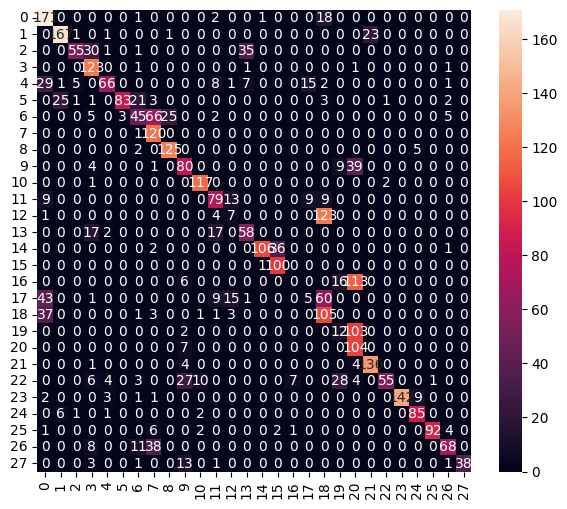

Classification Report
              precision    recall  f1-score   support

           0       0.58      0.89      0.70       193
           1       0.84      0.87      0.85       193
           2       0.87      0.45      0.59       122
           3       0.61      0.97      0.75       127
           4       0.85      0.49      0.62       135
           5       0.97      0.59      0.73       140
           6       0.51      0.30      0.38       151
           7       0.50      0.99      0.66       121
           8       0.83      0.95      0.88       132
           9       0.58      0.60      0.59       133
          10       0.89      0.97      0.93       120
          11       0.64      0.66      0.65       119
          12       0.18      0.05      0.08       135
          13       0.57      0.62      0.59        94
          14       0.98      0.73      0.84       145
          15       0.72      0.99      0.84       101
          16       0.00      0.00      0.00       135
     

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [148]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)
model.export('/home/tingtim/Code/hand-gesture-recognition-mediapipe/model/keypoint_classifier/savedModel')
# tensorflowjs_converter --input_format=keras /home/tingtim/Code/hand-gesture-recognition-mediapipe/model/keypoint_classifier/keypoint_classifier.h5 /home/tingtim/signifai-t/public/models
# tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model /home/tingtim/Code/hand-gesture-recognition-mediapipe/model/keypoint_classifier/savedModel /home/tingtim/signifai-t/public/models

INFO:tensorflow:Assets written to: /home/tingtim/Code/hand-gesture-recognition-mediapipe/model/keypoint_classifier/savedModel/assets


INFO:tensorflow:Assets written to: /home/tingtim/Code/hand-gesture-recognition-mediapipe/model/keypoint_classifier/savedModel/assets


Saved artifact at '/home/tingtim/Code/hand-gesture-recognition-mediapipe/model/keypoint_classifier/savedModel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(None, 28), dtype=tf.float32, name=None)
Captures:
  135701009099536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135701009103568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135701009102608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135701009097616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135701009100496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135701009101264: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [149]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp_uy889gt/assets


INFO:tensorflow:Assets written to: /tmp/tmp_uy889gt/assets


Saved artifact at '/tmp/tmp_uy889gt'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(None, 28), dtype=tf.float32, name=None)
Captures:
  135701009099536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135701009103568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135701009102608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135701009097616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135701009100496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135701009101264: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1746018856.425518   41794 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1746018856.425539   41794 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-30 21:14:16.425663: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp_uy889gt
2025-04-30 21:14:16.426342: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-30 21:14:16.426353: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp_uy889gt
2025-04-30 21:14:16.430480: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-30 21:14:16.451686: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp_uy889gt
2025-04-30 21:14:16.457481: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status: success: OK. Took 31820 microseconds.


7628

# Inference test

In [150]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/home/tingtim/Code/hand-gesture-recognition-mediapipe/hg-envnew/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [151]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [152]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [153]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 91 μs, sys: 8 μs, total: 99 μs
Wall time: 79.9 μs


In [154]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.07579515e-03 4.20294851e-01 2.37744842e-02 8.49845167e-03
 1.09091580e-01 7.70808831e-02 1.63532153e-03 7.98353358e-05
 1.17249379e-03 4.71342355e-04 1.40379183e-03 2.66841403e-03
 6.11461524e-04 1.95985977e-02 6.18648774e-05 3.42677197e-07
 2.19990071e-02 4.15880838e-03 4.05858562e-04 2.27679685e-02
 4.81449207e-03 2.57385433e-01 1.39140915e-02 1.10387504e-04
 5.09734964e-04 1.49671032e-05 1.02326530e-03 5.37638552e-03]
1
